# Airbnb Boston

In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Exploring calendar dataset

In [2]:
# loading the dataset, parsing dates
calendar = pd.read_csv("./data-boston/calendar.csv", parse_dates=['date'])
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [3]:
# how large is the dataset?
calendar.shape

(1308890, 4)

In [4]:
# let's see some statistics about numeric variables
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [5]:
# columns of the dataset
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [6]:
# let's see the number of distincts values of categorical variables
calendar.groupby(['date']).count()

,listing_id,available,price
date,,,
2016-09-06,3586,3586,570
2016-09-07,3586,3586,932
2016-09-08,3586,3586,999
2016-09-09,3586,3586,981
2016-09-10,3586,3586,956
...,...,...,...
2017-09-01,3586,3586,1795
2017-09-02,3586,3586,1798
2017-09-03,3586,3586,1802


In [7]:
# let's see the number of distincts values of categorical variables
calendar.groupby(['price']).count()

,listing_id,date,available
price,,,
"$1,000.00",460,460,460
"$1,002.00",5,5,5
"$1,004.00",1,1,1
"$1,006.00",1,1,1
"$1,007.00",3,3,3
...,...,...,...
$993.00,3,3,3
$995.00,69,69,69
$997.00,1,1,1


In [8]:
# convert price to float
calendar = pd.concat([calendar, calendar.price.replace('\$|\,', '', regex=True).astype(float).rename('price_num')], axis=1)

In [9]:
calendar.head()

,listing_id,date,available,price,price_num
0,12147973,2017-09-05,f,NaN,NaN
1,12147973,2017-09-04,f,NaN,NaN
2,12147973,2017-09-03,f,NaN,NaN
3,12147973,2017-09-02,f,NaN,NaN
4,12147973,2017-09-01,f,NaN,NaN


In [10]:
# let's see the number of distincts values of price_num > checking if de conversion is ok
calendar.groupby(['price']).mean()

,listing_id,price_num
price,,
"$1,000.00",6.941964e+06,1000.0
"$1,002.00",3.264664e+06,1002.0
"$1,004.00",7.633883e+06,1004.0
"$1,006.00",1.358562e+07,1006.0
"$1,007.00",5.536013e+06,1007.0
...,...,...
$993.00,8.253452e+06,993.0
$995.00,3.014693e+06,995.0
$997.00,1.122392e+07,997.0


In [11]:
# droping price str, rename price_num and check statistics
calendar = calendar.drop(labels=['price'], axis=1)
calendar.rename(columns={'price_num': 'price'}, inplace=True)
calendar.describe()

,listing_id,price
count,1.308890e+06,643037.000000
mean,8.442118e+06,198.438909
std,4.500149e+06,180.142913
min,3.353000e+03,11.000000
25%,4.679319e+06,85.000000
50%,8.578710e+06,150.000000
75%,1.279603e+07,255.000000
max,1.493346e+07,7163.000000


In [12]:
# creating a series with mean price per date
mean_price_per_date = calendar.groupby(['date']).price.mean()
mean_price_per_date.head()

date
2016-09-06    241.043860
2016-09-07    251.833691
2016-09-08    251.748749
2016-09-09    261.859327
2016-09-10    266.847280
Name: price, dtype: float64

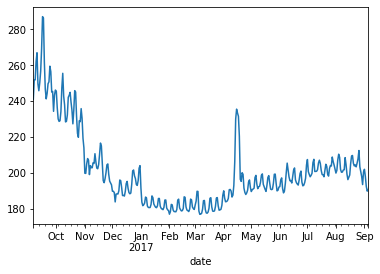

In [13]:
# plotting direct from dataframe
calendar.groupby(['date']).price.mean().plot();

In [14]:
# creating a series with moving average
mean_price_per_date.rolling(window=7).mean()

date
2016-09-06           NaN
2016-09-07           NaN
2016-09-08           NaN
2016-09-09           NaN
2016-09-10           NaN
                 ...    
2017-09-01    201.560475
2017-09-02    199.488927
2017-09-03    197.941568
2017-09-04    196.376402
2017-09-05    195.345060
Name: price, Length: 365, dtype: float64

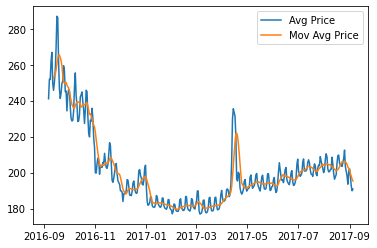

In [15]:
# plotting prices per date
plt.plot(mean_price_per_date.index, mean_price_per_date.values, label='Avg Price');
plt.plot(mean_price_per_date.rolling(window=7).mean().index, mean_price_per_date.rolling(window=7).mean().values, label='Mov Avg Price');
plt.legend();

In [16]:
# exploring avaiable variable
calendar.groupby(['available']).count()

,listing_id,date,price
available,,,
f,665853,665853,0
t,643037,643037,643037


In [17]:
# replacing true or false
available_dict = {'t': True, 'f': False}
calendar.replace({'available': available_dict}, inplace=True)

In [18]:
# checking the replace
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,NaN
1,12147973,2017-09-04,False,NaN
2,12147973,2017-09-03,False,NaN
3,12147973,2017-09-02,False,NaN
4,12147973,2017-09-01,False,NaN


In [19]:
calendar.groupby(['available']).count()

,listing_id,date,price
available,,,
False,665853,665853,0
True,643037,643037,643037


### Exploring listings dataset

In [20]:
# loading dataset
listings = pd.read_csv("./data-boston/listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [21]:
# list columns and dtypes
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [22]:
# looking basic statistics
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### Exploring reviews dataset

In [23]:
reviews = pd.read_csv("./data-boston/reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


### Looking for questions

In [24]:
# checking if price is float
listings.price.head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [25]:
# The listings dataset is the one with more columns and information, let's see the columns looking for new questions
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [26]:
# correlation between numeric var and plotting heatmap
listings.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.565820,-0.046503,-0.046503,NaN,0.089842,-0.010871,-0.050574,-0.014424,...,0.050435,0.012260,0.024344,0.030078,0.044997,0.067750,NaN,NaN,-0.040300,0.221421
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.565820,NaN,1.000000,-0.094764,-0.094764,NaN,0.016752,-0.052395,-0.103485,-0.068266,...,0.015577,-0.031821,0.025484,0.016448,0.022717,0.027856,NaN,NaN,-0.090363,0.183057
host_listings_count,-0.046503,NaN,-0.094764,1.000000,1.000000,NaN,0.124228,0.044281,0.160164,0.170443,...,-0.177580,-0.019006,-0.213198,-0.246705,0.015595,-0.207200,NaN,NaN,0.970535,-0.193939
host_total_listings_count,-0.046503,NaN,-0.094764,1.000000,1.000000,NaN,0.124228,0.044281,0.160164,0.170443,...,-0.177580,-0.019006,-0.213198,-0.246705,0.015595,-0.207200,NaN,NaN,0.970535,-0.193939
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.089842,NaN,0.016752,0.124228,0.124228,NaN,1.000000,0.319327,0.053818,-0.020733,...,-0.040302,0.001623,-0.074478,-0.053077,0.229395,-0.038994,NaN,NaN,0.125827,0.049496
longitude,-0.010871,NaN,-0.052395,0.044281,0.044281,NaN,0.319327,1.000000,0.083658,0.010164,...,0.003487,0.048692,-0.009397,-0.007538,0.038539,-0.001003,NaN,NaN,0.049769,0.109795
accommodates,-0.050574,NaN,-0.103485,0.160164,0.160164,NaN,0.053818,0.083658,1.000000,0.346914,...,0.015450,0.091648,-0.014015,-0.007164,0.008303,-0.006433,NaN,NaN,0.153344,0.007575
bathrooms,-0.014424,NaN,-0.068266,0.170443,0.170443,NaN,-0.020733,0.010164,0.346914,1.000000,...,-0.017573,0.026560,-0.053836,-0.046117,-0.028713,-0.012555,NaN,NaN,0.166171,-0.046208


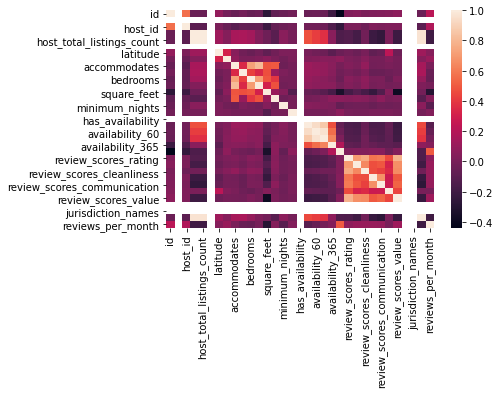

In [27]:
sns.heatmap(listings.corr());

## 1. What is the average price per neighbourhood?

In [28]:
# checking columns related with neighbourhood
neig_cols = [col for col in listings.columns if 'neig' in col]

In [29]:
listings[neig_cols]

,neighborhood_overview,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,"Roslindale is quiet, convenient and friendly. ...",Roslindale,Roslindale,Roslindale,NaN
1,"The room is in Roslindale, a diverse and prima...",Roslindale,Roslindale,Roslindale,NaN
2,The LOCATION: Roslindale is a safe and diverse...,Roslindale,Roslindale,Roslindale,NaN
3,Roslindale is a lovely little neighborhood loc...,NaN,NaN,Roslindale,NaN
4,"I love the proximity to downtown, the neighbor...",Roslindale,Roslindale,Roslindale,NaN
...,...,...,...,...,...
3580,NaN,Somerville,Somerville,Charlestown,NaN
3581,NaN,NaN,NaN,Allston,NaN
3582,"Cambridge is a short walk into Boston, and set...",NaN,NaN,Charlestown,NaN
3583,NaN,Somerville,Somerville,Charlestown,NaN


In [30]:
# counting unique values to understand the best variable that describes a neighbourhood
listings[neig_cols].nunique()

neighborhood_overview           1728
host_neighbourhood                53
neighbourhood                     30
neighbourhood_cleansed            25
neighbourhood_group_cleansed       0
dtype: int64

In [31]:
listings[neig_cols].nunique()/listings[neig_cols].count()

neighborhood_overview           0.796313
host_neighbourhood              0.016328
neighbourhood                   0.009862
neighbourhood_cleansed          0.006974
neighbourhood_group_cleansed         NaN
dtype: float64

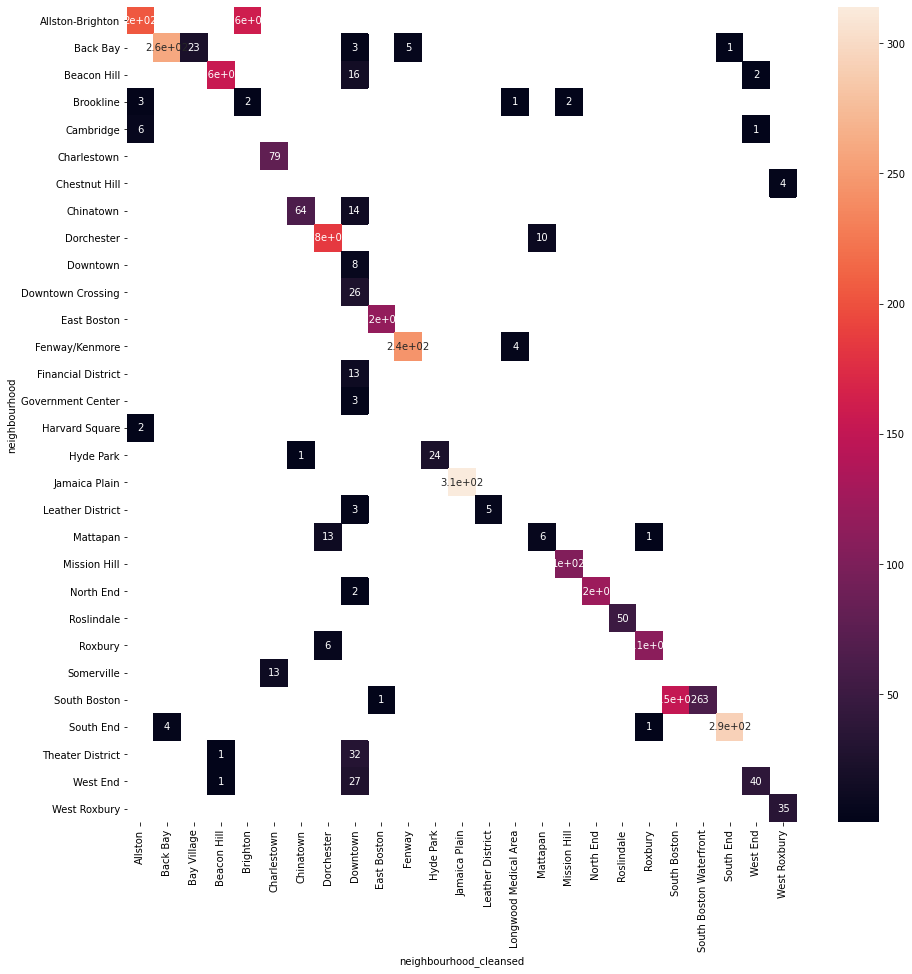

In [32]:
# comparing varibles to select the best
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(listings.groupby(['neighbourhood', 'neighbourhood_cleansed']).id.count().unstack(), annot=True);

In [33]:
# selected variables
listings[['neighbourhood_cleansed', 'price']]

,neighbourhood_cleansed,price
0,Roslindale,$250.00
1,Roslindale,$65.00
2,Roslindale,$65.00
3,Roslindale,$75.00
4,Roslindale,$79.00
...,...,...
3580,Charlestown,$69.00
3581,Allston,$150.00
3582,Charlestown,$198.00
3583,Charlestown,$65.00


In [34]:
# asjusting price to num
listings.price.replace('\$|\,', '', regex=True).rename('price_num')

0       250.00
1        65.00
2        65.00
3        75.00
4        79.00
         ...  
3580     69.00
3581    150.00
3582    198.00
3583     65.00
3584     65.00
Name: price_num, Length: 3585, dtype: object

In [35]:
listings = pd.concat([listings.drop(labels=['price'], axis=1), listings.price.replace('\$|\,', '', regex=True).astype(float)], axis=1)

In [36]:
# grouping and sorting the mean price per neighbourhood
price_per_neig = listings.groupby('neighbourhood_cleansed').price.mean().sort_values()
price_per_neig

neighbourhood_cleansed
Mattapan                    75.125000
Hyde Park                   86.548387
Dorchester                  91.639405
Roslindale                  98.428571
West Roxbury               107.108696
Allston                    112.307692
Brighton                   118.767568
East Boston                119.153333
Mission Hill               121.967742
Longwood Medical Area      138.444444
Jamaica Plain              138.478134
Roxbury                    146.333333
South Boston               187.609195
North End                  195.678322
Charlestown                198.045045
South End                  204.349693
West End                   209.591837
Fenway                     220.393103
Beacon Hill                224.443299
Chinatown                  232.352113
Downtown                   236.459302
Back Bay                   240.950331
Leather District           253.600000
Bay Village                266.833333
South Boston Waterfront    306.060241
Name: price, dtype: float64

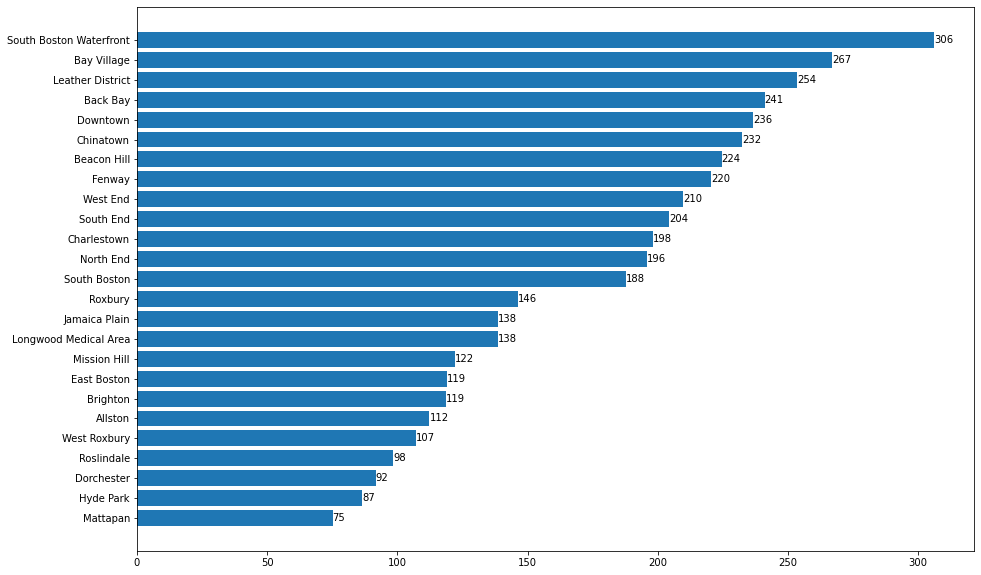

In [37]:
# plotting a bar chart
plt.subplots(figsize=(15,10));
plt.barh(price_per_neig.index, price_per_neig.values);

for i in range(len(price_per_neig.values)):
    plt.text(price_per_neig.values[i], i, f"{price_per_neig.values[i]:.0f}", va='center');

## 2. What is the busiest epoch of the year?

In [38]:
# start rembering the columns of the calendar
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  bool          
 3   price       643037 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 31.2 MB


<AxesSubplot:xlabel='listing_id'>

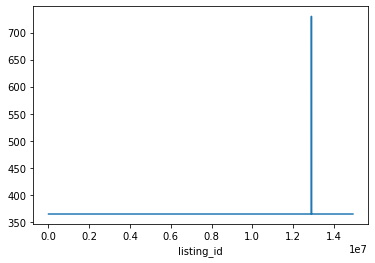

In [40]:
# looking if every id has the same count of rows
calendar.groupby('listing_id').date.count().plot()

In [44]:
# looking an id tha has more than the others
calendar.groupby('listing_id').date.count().idxmax()

12898806

In [54]:
calendar.groupby('listing_id').date.count()[calendar.groupby('listing_id').date.count() > 365]

listing_id
12898806    730
Name: date, dtype: int64

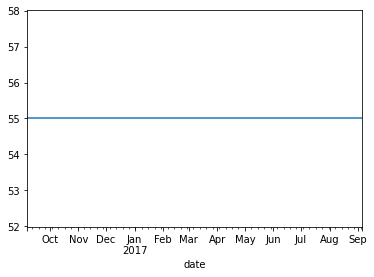

In [60]:
# pick an id and looking if the price changes over the year
calendar[calendar.listing_id == 14928000].groupby('date').price.mean().plot();

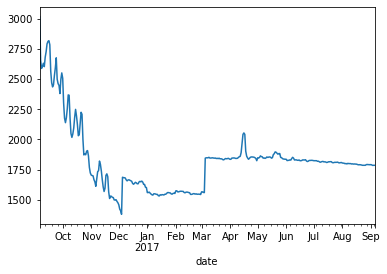

In [62]:
# plot the occupation by date
calendar[calendar.available == False].groupby('date').listing_id.count().plot();

In [63]:
occup_by_date = calendar[calendar.available == False].groupby('date').listing_id.count()
occup_by_date.head()

date
2016-09-06    3016
2016-09-07    2654
2016-09-08    2587
2016-09-09    2605
2016-09-10    2630
Name: listing_id, dtype: int64

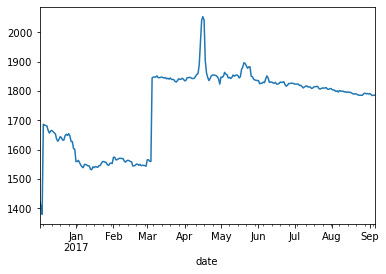

In [70]:
# it appears that the closiest dates have the high occupation rate, this makes sense because there are people that rent a house
# close to the date of use. I remove the closiest dates (and I'll cannot talk abou the occuppation of these months),
# by other hand, the data show more stability and could be a better proxy of busiest epoch
occup_by_date[occup_by_date.index > pd.to_datetime('2016-12-01')].plot();

In [71]:
# look for the specific date of the spike in the chart
occup_by_date[occup_by_date.index > pd.to_datetime('2016-12-01')].idxmax()

Timestamp('2017-04-16 00:00:00')

In [ ]:
# 2 considerations, jan-mar is the coldest months in Boston and is expected to have a lower occupation rate
# In April, 17 2017 occured the Boston Marathon and is the Patriot's Day, a holliday in Massachusetts

## 3. Can we predict house's price based on prior data?